# Creating a Sea Temperature Color Map

In this notebook you'll learn how to adapt existing code to fit your particular data set. You won't need to use all of these functions again, but you should understand how they work.

**Reminder: To run the code in a Jupyter Notebook cell, click inside the cell and press "shift" and "return" on your keyboard at the same time.**

Let's start out by importing all the libraries we'll need:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv # This is a library that allows us to work with CSV files even if we're not using pandas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This code opens the data file, create a CSV reader object to read the data, and converts it into a list or lists using the built in Python list() function.

In [3]:
csvFile = open("/content/drive/My Drive/Colab Notebooks/SeaTemp12_2002 (1).csv", 'r') #'r' means we want to read
csvReader = csv.reader(csvFile, delimiter=',')
data_lists = list(csvReader)#--> puts it in rows and colomuns 

Let's take a look at the first item in data_lists:

In [4]:
print(data_lists[0]) #first row, items in it --> lists in a list 

['99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', 

That was a lot of data! Let's use the len() function to find out how many data points there were in **just one row**:

In [5]:
print(len(data_lists[0]))#width

720


Let's find out how many of those there are! Use the len() function:

In [6]:
print(len(data_lists))#height

360


The number of items in one row is also the width of the image we are creating. The number of rows is the height. Let's assign these values to variable so we can use them later:

In [7]:
width = 720
height = 360

Now we're going to use a new numpy function that creates an empty matrix. A matrix is like a grid made up of lists.

In [8]:
grid = np.empty([height, width, 3], dtype=np.uint8) 
# We have to specify the height and width of the matrix along with the number of items 
# we can put in each spot on the grid. We want 3 because each color value has 3 numbers.
# Finally, we specify the type of data we will put into the matrix.

Now we're going to use some code you're used to: "for loops" and conditionals! But we are making things a little more complicated using the enumerate() function. Using enumerate(), you keep track of both the index and the value in a "for loop".

In [9]:
all_values = [] # We will fill in this empty list with all the data values as we go
#C = the values of colomuns A, B, C --> A = 0, and then count #R is the ROW number, but like all, row 1 = 0
#r will go all of the way to r =720, and c will do to 360 --> eitheir indices of each row or column
for r, row in enumerate(data_lists): #not 9999 = SEAN TEMP--
#all_values is a filtered list for all sea values
    for c, value in enumerate(row):
      #warmer colors = red, cooler = blue
        if float(value) < 99999: #tells us if it is sea temp or land 99999= lamd temp
            all_values.append(float(value)) # This is where we fill in the list with all data values
        if float(value) <= -2: #add more colors
            grid[r, c] = [23, 30, 92]
        elif float(value) <= -5:
            grid[r, c] = [22, 38, 82]
        elif float(value) <= 0:
            grid[r, c] = [22, 32, 79]
        elif float(value) <= 2:
            grid[r, c] = [28, 90, 87]
        elif float(value) <= 5:
            grid[r, c] = [92, 30, 38]
        elif float(value) <= 35:
            grid[r, c] = [22, 32, 93] #only have one color that represents many colors
        else:
            grid[r, c] = [0,0,0]

Now that we have all of our data in a single list, we can find the max and the min:
Hint: Use this information to help you adjust your conditionals!

In [10]:
print(min(all_values))
print(max(all_values))

-2.0
35.0


Now it's time to use matplotlib to show our image! We already imported the library, so we can get right to it:

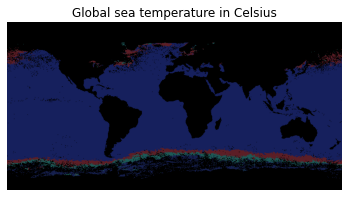

In [11]:
plt.title("Global sea temperature in Celsius")
plt.imshow(grid)
plt.axis('off')
plt.savefig("Land_temperature.png",dpi = 1000)
plt.show()

## Coding Challenge:
Change the code so that you create a map for the sea temperature in 2016.